# About the Data
The dataset contains eBay auction information on Cartier wristwatches. There are 7 variables (including dependent variable).

#### Data Description

##### Independent Variables -    
    1. auctionid - unique identifier of an auction
    2. bid - the proxy bid placed by a bidder
    3. bidtime - the time (in days) that the bid was placed, from the start of the auction
    4. bidder - eBay username of the bidder
    5. bidderrate - eBay feedback rating of the bidder
    6. openbid - the opening bid set by the seller
    
##### Target Variable -
    7. price - the closing price that the item sold for (equivalent to the second highest bid + an increment) 

# Task
    
##### Problem Statment - 
       Putting out an item for an online auction can be very tricky and even stressful sometimes. You may be struggling with how much you can put as an opening bid or how much the final bid will be. If you were able to predict the final bid, you could simply choose an appropriate opening bid or even decide to not auction the item at all.
 
##### Objective
        Build a Machine Learning model to predict the closing price in an online auction.


# Evaluation criteria -  Root Mean Squared Error

In [1]:
## Problem Ananlysis



## Loading Required libraries

In [2]:
import pandas as pd # for data manipulation
import numpy as np # for math calculation

# for Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Preprocessing, Model creation & Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # Linear Regression
from sklearn.ensemble import RandomForestRegressor # Random Forest Regression
from sklearn.ensemble import ExtraTreesRegressor # Extra Trees Regression
from sklearn.ensemble import AdaBoostRegressor # AdaBoostRegression
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting Regression (in detail)
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score # explained variance score
from sklearn.metrics import mean_squared_log_error # computes a risk metric

# For Warning ignore
import warnings
warnings.filterwarnings('ignore')

In [3]:
# sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2,
#                                        min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
#                                        max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
#                                        bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, 
#                                        warm_start=False, ccp_alpha=0.0, max_samples=None)[source]

# Data Preparing

### Loading dataset

In [4]:
auction_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/auction_data/train_set_label.csv" )
df = auction_data.copy()
df

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price
0,1644594033,493.00,6.999456,boraborabora,67,9.99,498.00
1,1639309309,30.00,1.669618,aclbjc,0,1.00,374.99
2,1644109746,3103.00,6.917986,nelsoncpm,7,1.00,3103.00
3,1649858595,175.00,3.107014,pialu9,4,7.99,202.50
4,1647846714,226.00,2.721319,geemeetee@aol.com,17,1.00,905.45
...,...,...,...,...,...,...,...
1208,1643244227,750.00,3.544514,adammurry,5,499.00,1025.00
1209,1649639405,1505.00,1.583704,anasandak,1,1.00,1880.00
1210,1640179146,320.99,2.608287,bdsr1,0,1.00,455.00
1211,1644049270,1250.00,6.857986,hugo44,6,0.01,1600.00


In [5]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/auction_data/test_set_label.csv')
test = test_data.copy()
test

,auctionid,bid,bidtime,bidder,bidderrate,openbid
0,1640550476,175.00,4.329410,simonho2001sg,8,1.0
1,1644343468,111.11,0.587164,tab999@msn.com,84,1.0
2,1639979107,103.50,6.999572,inyerdrms,2,5.0
3,1649718196,620.00,2.750775,kjr2306,24,1.0
4,1644077820,60.00,1.393611,chevysred,-1,1.0
...,...,...,...,...,...,...
332,1639309309,270.00,3.501551,lass1004,5,1.0
333,1650699048,107.77,5.521979,bupper99,260,10.0
334,1641629836,365.00,5.486759,kinkino,0,250.0
335,1642005995,375.00,1.941875,bdoocean@aol.com,25,99.0


#### Analyze Data

In [6]:
# Checking Head records
df.head(10)

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price
0,1644594033,493.0,6.999456,boraborabora,67,9.99,498.00
1,1639309309,30.0,1.669618,aclbjc,0,1.00,374.99
2,1644109746,3103.0,6.917986,nelsoncpm,7,1.00,3103.00
3,1649858595,175.0,3.107014,pialu9,4,7.99,202.50
4,1647846714,226.0,2.721319,geemeetee@aol.com,17,1.00,905.45
5,1644760539,50.0,2.481134,darbarskip,1,1.00,327.23
6,1644739924,455.0,6.591678,dollfacepumpkin,10,1.00,455.00
7,1648041601,251.5,5.727454,bogdanbost,1,1.00,335.00
8,1644357387,50.0,0.328600,bdonahue9@aol.com,22,1.00,640.00
9,1644077820,200.0,0.322894,msvail,0,1.00,374.00


In [7]:
# Checking Tail records
df.tail(10)

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price
1203,1644760539,65.50,1.176192,bosspad,2,1.00,327.23
1204,1643187764,100.00,0.247396,nickoftimeblue,8,20.00,276.05
1205,1650162165,500.00,4.997257,tampa_tap,0,1.00,620.00
1206,1641629836,300.00,0.611944,vleykin,3,250.00,550.00
1207,1640653873,185.00,6.766910,jimboysan,4,50.00,202.50
1208,1643244227,750.00,3.544514,adammurry,5,499.00,1025.00
1209,1649639405,1505.00,1.583704,anasandak,1,1.00,1880.00
1210,1640179146,320.99,2.608287,bdsr1,0,1.00,455.00
1211,1644049270,1250.00,6.857986,hugo44,6,0.01,1600.00
1212,1639333116,161.00,0.226065,aegean-2001,65,155.00,501.62


In [8]:
print(df.info(), "\n")
print(test_data.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   auctionid   1213 non-null   int64  
 1   bid         1213 non-null   float64
 2   bidtime     1213 non-null   float64
 3   bidder      1213 non-null   object 
 4   bidderrate  1213 non-null   int64  
 5   openbid     1213 non-null   float64
 6   price       1213 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 66.5+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   auctionid   337 non-null    int64  
 1   bid         337 non-null    float64
 2   bidtime     337 non-null    float64
 3   bidder      337 non-null    object 
 4   bidderrate  337 non-null    int64  
 5   openbid     337 non-null    float64
dtypes: float64(3), int

In [9]:
# Shape of data
print("> The auction data consist of", df.shape[0],'rows &', df.shape[1],"columns.", "\n")
print()
print("> The auction data consist following columns as - ", "\n", df.columns)

> The auction data consist of 1213 rows & 7 columns. 


> The auction data consist following columns as -  
 Index(['auctionid', 'bid', 'bidtime', 'bidder', 'bidderrate', 'openbid',
       'price'],
      dtype='object')


    Our Auction dataset consist 1213 rows across 7 columns including "price".

In [10]:
# Checking descriptive Statistics
df.describe()

,auctionid,bid,bidtime,bidderrate,openbid,price
count,1.213000e+03,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,1.644577e+09,647.652539,4.078951,31.807914,159.142852,1010.246076
std,3.566101e+06,701.003386,2.505148,79.112571,388.456626,832.676139
min,1.638844e+09,1.000000,0.007535,-4.000000,0.010000,103.500000
25%,1.641784e+09,161.000000,1.578866,1.000000,1.000000,374.990000
50%,1.644139e+09,400.000000,4.302025,5.000000,7.990000,680.000000
75%,1.647847e+09,895.000000,6.777083,30.000000,175.000000,1600.000000
max,1.650986e+09,5400.000000,6.999965,1303.000000,5000.000000,5400.000000


    Descriptive Statistical Analysis as -
    
        1. auctionid - an auction id of bid
        2. bid - a bid placed by bidder where 
                 mean = 647.65, std = 701.00, minimum bid = 1.00, maximum bid = 5400.00 & median = 400.00
        3. bidtime - mean = 4.08, std = 2.51, minimum = 0.00, maximum = 7.00 & median = 4.30
        4. bidderrate - mean = 31.81, std = 79.11, minimum = -4.00, maximum = 1303 & median = 5
        5. openbid - mean = 159, std = 388.46, minimum = 0.01, maximum = 5000.00 & median = 7.99
        6. price - this is our target value
                   mean = 1010.25, std = 832.68, minimum = 103.50, maximum = 5400.00 & median = 680.00
                
    from descriptive statistics we can say that data is highly affected with outliers.
          Outlier affected columns are - bid, bidderrate, openbid and even our target variable price also.

#### Data Visualization

###### Target Variable

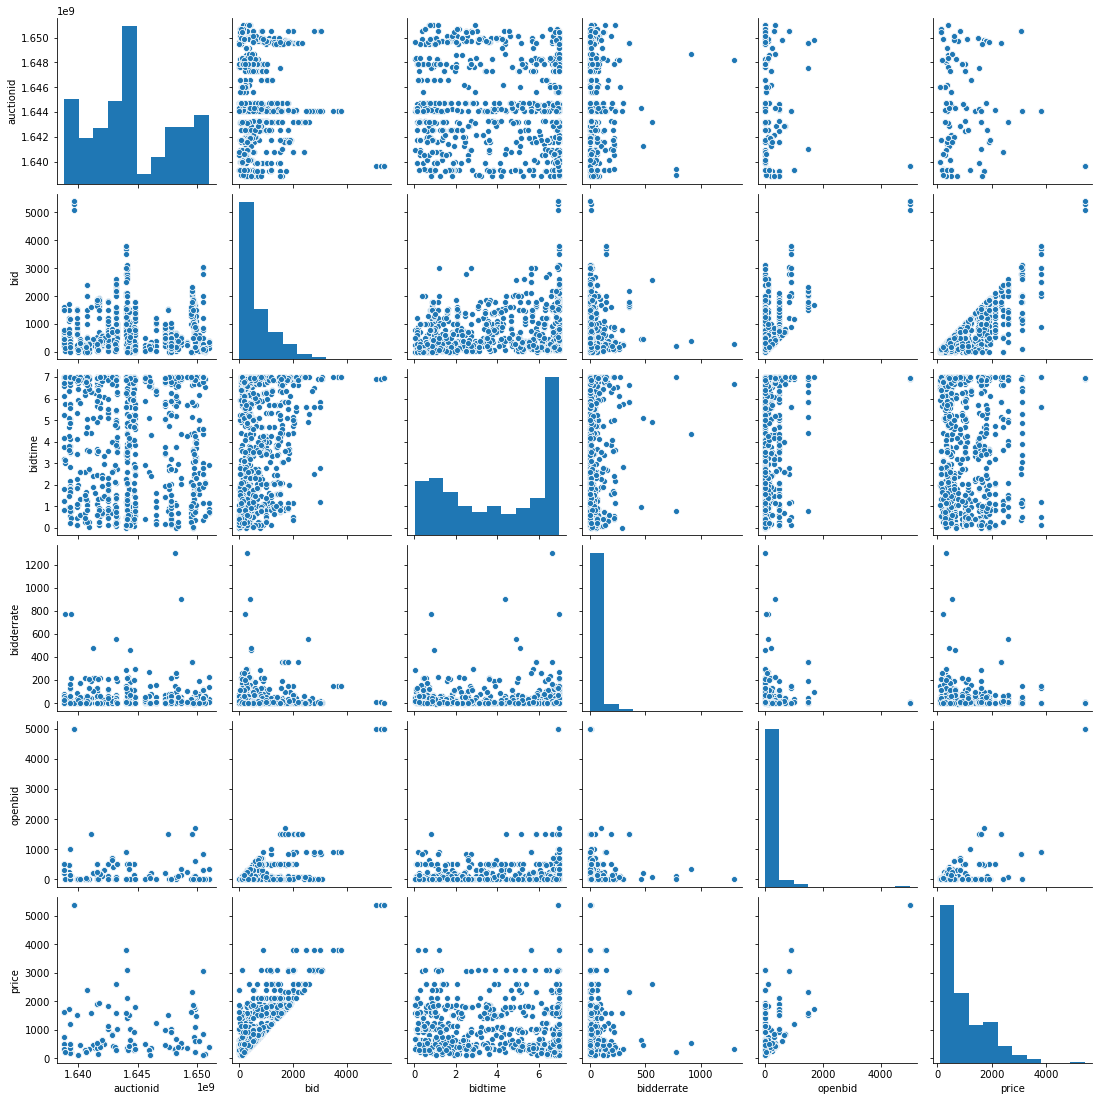

In [11]:
# Pairplot
sns.pairplot(df)

As we concluded in Descriptive Statistic Analysis, from above pairplot we can see data is largely affected by outliers and also not uniformally distributed

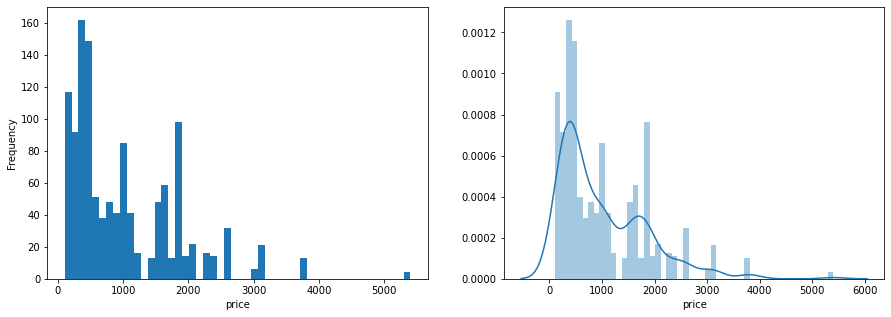

In [12]:
# Plotting histogram for Target variable - Price
plt.subplot(1, 2, 1)
df['price'].plot(kind = 'hist', bins = 50, figsize = (15, 5))
plt.xlabel("price")
plt.subplot(1, 2, 2)
sns.distplot(df['price'], bins = 50)


    from above Histogram & Density plot we can see, target variable has alot outliers & their is break in consistency

##### Independent Variables

In [13]:
df.nunique()

auctionid      97
bid           453
bidtime       993
bidder        439
bidderrate    125
openbid        45
price          86
dtype: int64

In [14]:
# loading Plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
py.init_notebook_mode(connected=True)

In [15]:
from scipy.stats import skew
from scipy.stats import kurtosis

def plotBarCat(df,feature):
        
    x1 = df[feature]
    
    trace1 = go.Histogram(
        x=x1,
        opacity=0.75
    )
    data = [trace1]
    layout = go.Layout(barmode='overlay',
                      title=feature,
                       yaxis=dict(title='Count'
        ))
    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig, filename='overlaid histogram')
    
    def DescribeFloatSkewKurt(df,target):
        print('-*-'*25)
        print("{0} mean : ".format(target), np.mean(df[feature]))
        print("{0} var  : ".format(target), np.var(df[feature]))
        print("{0} skew (should be 0 for normal distribution) : ".format(target), skew(df[feature]))
        print("{0} kurt (should be 0 for normal distribution) : ".format(target), kurtosis(df[feature]))
        print('-*-'*25)
        
    DescribeFloatSkewKurt(df,feature)
 

In [16]:
plotBarCat(df,df.columns[1])

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
bid mean :  647.6525391591096
bid var  :  491000.631057856
bid skew (should be 0 for normal distribution) :  2.183123579342089
bid kurt (should be 0 for normal distribution) :  7.489135419933541
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [17]:
plotBarCat(df,df.columns[2])

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
bidtime mean :  4.078951444274527
bidtime var  :  6.270594766998514
bidtime skew (should be 0 for normal distribution) :  -0.18506584033180148
bidtime kurt (should be 0 for normal distribution) :  -1.5545623186837252
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [18]:
plotBarCat(df,df.columns[3])

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


TypeError: Could not convert boraboraboraaclbjcnelsoncpmpialu9geemeetee@aol.comdarbarskipdollfacepumpkinbogdanbostbdonahue9@aol.commsvailjepattiiiturbomausitrunkbathwhalen@northlink.compdhsu1dre_313@yahoo.compascal1666apfb@excite.comcnelisb2hatsmkect10adammurryb2hatsnjbirdmomazamora610@cs.comhora01pereluzi00jimboysannana-tylermapguyangelaleumkb98renob2sigsrusbogdanbostregman324peterfung@aol.comhoneycakesmoneybiggeo@hotmail.comazamora610@cs.comhappyrovadelux1cspcsoftwaremannjbirdmomsamkapspartan@mindspring.comsirocco@prodigy.netbahamawomansandsellerotan1810sirocco@prodigy.netro50014restdynamicspablofennymoreewe1950iwantu2perrymdsaphi7171@amexol.netdream4321lola723darwal-deppro2cer@hotmail.comnorthwestportlandtraderlennonjasonmia@netzero.necindy4779lemsgemssmartgirl0204lass1004cvmiami1cutiepatutiesobeamskymom19750926owhy18ifonawintersnightatravelljimboysansudohaniclubmemberlass1004blackdotlacagninarolexaddictskylzatop@excite.comfreembdhestellgurucutecube@mac.comcvmiami1marcusclickgram999orchidmktg@aol.comlola723sophiecorbettzatsplits@aol.comgisbert19750926osaphi7171@amexol.netlacagninagrowingwildbally29loreparra@excite.comgknguyenpereluzi00restdynamicsnetabedleggoe@msn.comalfietraverssaphi7171@amexol.netalfietraversaninaninbosspadlass1004terryd2053spikeit1990treasureking.comdalear6@aol.comdleggoe@msn.comhelvetklute1nana-tylerlc30cunmrsjmsolosmileoftenvknsorlanfsjannypie1lass1004callawayjb@aol.comtimeatlast19750926oorchidmktg@aol.comnjbirdmomfriscotheman@aol.comhelvetvpolyakbosspadsirocco@prodigy.netrichardgzlacagninachrissiegurldiamonddr1@aol.comanasandakhugo44oschoffstwhalen@northlink.comrplfundinggntburkewlp@mediaone.netjanno47marky63orlanfstoadotaboraboraborajtr777@aol.comcutiepatutiesobesomto_offohhugo44overflowingclosettoadotajackofspeednorthwestportlandtradersactogroovebuyall5scott@purplepicket.comcrta@ti.comizzy87dedeszavion1333@hotmail.comleonardcohenfanbrigidsboyterryd2053mlsrbrt@aol.comdoc213restdynamicsafaucherzatsplits@aol.comfossil1973strongobdleggoe@msn.comdiegormepcsoftwaremanjuseasrskala@easytel.netjpamro@aol.comvpham.2000k.s.cohen@verizon.net19750926obasilm@mediaone.netjuseaslass1004tampa_taplafontant155toadotaoverflowingclosetbirdkowskyrsahaj@yahoo.commkb98haring123coharleyoverflowingclosetperrymdahmadksandragiantalwangk.daruwala@btconnect.comdressy-bessyhoneycakesmoneyyoder9spikeit1990drob223jimboysancindy4779akryzakrichardgzpegclldumbarton2715angelaleuhappyrovangow34vleykinadammurrytoadotanolalacagninaccie51xxwlp@mediaone.nethover@ucnsb.netboxsterbearlc30justine@701701.comcorbatasbutchballswhiteeagle@shadow.netmroth1099marky63happyrovasami-girladammurryvknsjimboysanmgicatwomanvdukatbutchballskasika5k.s.cohen@verizon.netfvetahbhandrevleykinvdukatmdhallinoverflowingclosetavion1333@hotmail.comduderinoyoumastmarky63ctlisalisaoverflowingclosetk.s.cohen@verizon.netcindy4779saphi7171@amexol.netmgicatwomanyuriyshrifteylik@altavistraritylinkmarcusclickva2cafjfds@aol.comcarlondonoskygirlabgucci725cindy4779raritylinkfeyaposakapsonmgicatwomanadammurryfreembdcudd8963@aol.comkfreyvog@tampabay.rr.comannekilborn@hotmail.comcarloss8055mrm0214@yahoo.compascal1666yung-wensactogrooverumpelstillskinheres2youturbomausienglishteacher21various19735kpimp4life76lass1004sirocco@prodigy.netpascal1666natashamthehandmadensnychowderheaddu38120gram999vpolyakpascal1666bogdanbostrestdynamicsvangoghbouviemyactreasuresartkallrrsumbavpolyaktrunkbathyoumastykelectro@hotmail.comewe1950ps138pascal1666nana-tylermotion32ox21cpascal1666corradi19rrsumbavpolyakbirdkowskyscandalmus@aol.comjettie21sami-girlblackdotroyscocufflink@erols.comlass1004philwl3290cnelisdebrittoden-igmasactogroovekinkinovangoghbouviemgicatwomanbally29feyaposthe.hammervkmathewsgram999motion32kinkinosvm2kdidckdtnscott@purplepicket.combosomviebcemborakapsonyuriyshrifteylik@altavistps138photosflashertea_pot_girlmapguyanasandakdarwal-deprkqhoney-mariedgulkis@mcdata.comyokarinecvmiami1thehandmadens2000joedre_313@yahoo.comthehandmadensivgenmmedina@calcsea.orggabz2383ojjuice2@aol.com19750926omotion32hot_rookiemaxwell_gemsrrsumbahappyrovanguyenat@san.rr.comgmorgan@elliman.comcheddaboynguyenat@san.rr.comawinningbidpereluzi00bosspadrestdynamicshoneycakesmoneyspartan@mindspring.comsignedpiecesinck.daruwala@btconnect.comsoul.reaverkdrew@prodigy.netsunday322jennoubceezar1@aol.commyactreasuresskylscandalmus@aol.comwatchv70t5bdsr1strongobmarcusclicksoysoy75ccd79vknsgucci725bogdanbostnorthwestportlandtraderrikluttmermmedina@calcsea.orgdressy-bessyluxurysource001lacagninafreembdhappyrovaadammurrymdhallinsoul.reaverkasika5gram999photosflasherjanss454@wxs.nlcindy4779du38120honeycakesmoneyvat15@earthlink.net19750926ohugo44ifonawintersnightatravellacbrehugo44jdrinazsaphi7171@amexol.nethelvetcbcolqunounojbiiihappyrovadre_313@yahoo.competerfung@aol.comprincess-gingerberler@msn.comimurreson4livingk.l.pineb2hatsjennoudarwal-deptampa_tapsoul.reaverfjfds@aol.comhseldinroticssorlanfsanncm77@aol.commarkcic@aol.comcarloss8055derek1881finn69helvetmotion32fortlaud.collectiondispassiontrunkbathsylvesterii9lightsblackdotmkect10cvmiami1compfc@aol.comkasika5aclbjcalbatross007kinkinoanjaraboxsterbearhappyrovaboxsterbearpuppypuppycrazy4watchesgabz2383dream4321greenrobemarkcic@aol.comboberlander@slk.com31strawberrybutchballsizzy87hbhandrebutchballsmapguycarloss8055jettie21growingwildsylvesteriilarryr911aprefernolarestdynamicsbcemborcrazy4watchesskw80104bosspaddkbaynana-tylerjjaslowskiboberlander@slk.comsaphi7171@amexol.nethelvetadammurryscandalmus@aol.comnatashamnguyenat@san.rr.comgisberthappyrovatoadotapascal1666treasureprincessnorthwestportlandtraderorchidmktg@aol.comm3zy6fvetaboraboraboracarloss8055queenbebe71hjg6593dedeszlass1004chi-town7corradi19butchballstori5678@aol.comfreembdcutecube@mac.com19750926ootan1810sophiecorbettadihcudkbaysunkisses2001alexikuazamora610@cs.comhugo44adammurryfossil1973capitalsquare31strawberryyoumastrnmichellehappykid31strawberrytennisart7@aol.comhappyrovaykelectro@hotmail.comtampa_tapbobfitz@bellsouth.netnana-tylerstestestefreembdcvmiami1rrsumbabooba69morerdtomita-fukuyopascal1666auntdotbidsderek1881sophiecorbettnaplboyk.s.cohen@verizon.netspikeit1990averartjvaynshtokfreembdtimevuhappyrovabosspadpascal1666ljr32dadjr@stargate.netlatinirishbutchballsralph.oman@dechert.comchevysredavion1333@hotmail.comeddsporttoadotaadammurryesmodeustampa_tapnetabelola723en-igmasharpei1bellsouthel_coleccionistasoul.reaverwpopecheddaboyjzdennispialu9hjg6593cvmiami1skygirlabinvestmoore2bdsr1ad48170k.daruwala@btconnect.comrrsumbafuzzy3028akryzakfriscotheman@aol.comdiegormehoneycakesmoneyvalleartjvaynshtoktrunkbathgisbertazamora610@cs.comsandsellerzatop@excite.comjpamro@aol.comyokarinebirdkowskywatchlover24honeycakesmoneyinvestmoore2pascal1666butchballskinkinofilmwearhoneycakesmoneynsala12freembdlass1004pascal1666adammurrytimevumarky63nickoftimebluesjcnguyengotpaydmaxwell_gemscutiepatutiesobebdoocean@aol.comyung-wenjillkilleenspartan@mindspring.comcindy4779orchidmktg@aol.comtrunkbathcompfc@aol.comfroilandahappyrovamillyjohnccd79debrittodadammurryhhn1998darwal-depsaphi7171@amexol.netbirdkowskytessieg.trunkbath19750926onsala12jimboysanps138josephvkuca@msn.comkimbo930freembdmyactreasuresrestdynamicsfuturepilotstestestethe.hungladioly682jeweleyesccd79crazy4watchesbrigidsboygrowingwildcvmiami1tealeaf9earljrainbowdavidsongirl2orchidmktg@aol.comhartmutophilwl3290pcsoftwaremananasandakbdsr1rnmichellepascal1666restdynamicszmxudressy-bessycindy4779youmastdream4321jzdennisaclbjcoschoffsttigerwhisper2mnyboxersphotosflasherhappyrovatreasureprincesspialu9yung-wenpialu9snb11somto_offohfreembdcvmiami1ngow34darwal-depbaby1228geemeetee@aol.comcompfc@aol.comfreembdvat15@earthlink.netvangoghbouvieblackdotsami-girljanetfugarazzomotion32reed.nlcindy4779bdsr1delux1cshelvetamskymomgjuncapascal1666ososerjzdennis24kniceaclbjcluxustoysrumpelstillskincarla_kroezeshetellia@aol.comcourt_carreker19750926o7794369vpolyak12345678birdjjaslowskiafrye37076@aol.comdiegormeseriwanvdukatangelaleumb@wellsref.com19750926opcsoftwaremanawinningbidlass1004debrittodstilepts@aol.comhoneycakesmoneyzatop@excite.comrestdynamicstreasureprincesssoysoy75artkallaegean-2001zatop@excite.comlittlekittygirlturbomausiairun101minni36gisberten-igmanjbirdmomangelaleudleggoe@msn.comgrayfirmiwantu2perrymdhappyrovanetaberikluttmerqueendebi2000oschoffstbutchballs2mnyboxersviolinisimoiiiimdvangoghbouviestrongobgisbertskkindvall@scottsbluff.neadammurrygate99amskymomphotosflashermarky63jseidfreembdgeemeetee@aol.comchevysredfeyapospascal166619750926ohugo44tessieg.hhfgfrehmvyuriyshrifteylik@altavisteosnead@aol.comkylixbogdanbostdarbarskipcorbataslass1004cvmiami1steven1328nguyenat@san.rr.comfreembdpialu9paudstanasandakk.s.cohen@verizon.nettessieg.skw80104puppypuppyearljrainbowlass1004vickiejaykaysurfingbig_boyc5193dema_luligm492@columbia.edukpimp4life76restdynamicscvmiami1mouse0919jimboysanperrymdgrowingwildssze88corbatassharpei1bellsouthk.s.cohen@verizon.netyokarinealbertmillerfreembd31strawberrymotion32hartmutootan1810lennonjasonmia@netzero.neotan1810vkmathewskfreyvog@tampabay.rr.comewe1950mmedina@calcsea.orgdarwal-depsigsrusnelsoncpmamskymom31strawberrynana-tylergolfhacksawbaby1228mdalo36124@aol.comtampa_tapanasandakjsteinpsygntburkesmileoftengucci725birdkowskyduderinopascal1666bogdanbostdarwal-dep5038scoopymgicatwomanrestdynamicsdjpjohn@aol.comzatop@excite.com12girldarwal-depbdoocean@aol.comdaviddonofriofreembdmarky63vdukatcarloss8055freembdstrongobnjbirdmomtrunkbathpwr2mvuenthalpy1basilm@mediaone.netelliseklc3019750926osandragianvkmathewsbdsr1deroode7794369jzdennis12345678birdbally29duderinofxschmidttongyancarloss8055freembdarnoldpwctampa_tapbosspadklove86650@aol.comtessieg.libobo31strawberryjillam58signedpiecesinc12345678birdcrazy4watchesotan1810perrymdamerlandraritylinkbutchballstrunkbathgoldpleasehglinberg@aol.comsuperstore4lessrrsumbadarwal-depsandragiansactogroovegolfhacksawhbhandremarie0711sandsellerbutchballslass1004simonho2001sgnana-tylerscandalmus@aol.commaxwell_gemsrrsumbavkmathewsbirdkowskygbcoinsesquared@home.comavion1333@hotmail.comderoodedscollier3criteenrsency@disnow.comsvm2kmarcusclickscottuysal77conkuntampa_tapbosspadgisbertjuseasboxsterbearnjbirdmomanasandakwatchv70t5oseofossil73cvmiami1mmedina@calcsea.orgboraboraborababy1228tessieg.darwal-depadammurrykiero1@webtv.comrplfundinggrayfirmboberlander@slk.comadammurrymom_he_she_hitmehora01vpolyaktab999@msn.comhelvetmarcusclickmjopusone@aol.comjanno47timeatlastsaphi7171@amexol.nethappyrovaososerhappyrovabutchballscvmiami1spartan@mindspring.comkvam@home.comcindy4779lass1004adihcurnb4orchidmktg@aol.comoverflowingclosetadammurryadammurrymyactreasuresglobalartcomm@aol.comhhfgfwschorer@earthlink.nethelvetcarloss8055youmastadammurrytampa_tapvpolyakmyactreasurescapitalsquaregolfhacksawvat15@earthlink.netrrsumbaen-igmapascal1666hglinberg@aol.comdoc213helvetmillyjohnhoney-marieroyscocarloss8055zatop@excite.com19750926oimurreson4livingdarbarskipgotpaydeddsportfriscotheman@aol.comavion1333@hotmail.comtigerwhispermotion32hbhandregucci725pialu9happyrovalibobogisbertyuriyshrifteylik@altavistk.daruwala@btconnect.comacbrecutecube@mac.com19750926oauntdotbidsbally29smileoftensoysoy75buyall5signedpiecesincleonardcohenfansvm2kbutchballsthe.hunanncm77@aol.comsirocco@prodigy.net31strawberryairun101cindy4779dleggoe@msn.commaxwell_gemsnetabephotosflasherjanss454@wxs.nlgate99svm2kpereluzi00dscollier3court_carreker31strawberrytreasureking.comsunday322cvmiami1gisbertboberlander@slk.comboxsterbearcnelisdebrittodjettie21jvaynshtokfeyaposmarcusclickoverflowingclosetbosspadsigsrusbrigidsboyeosnead@aol.comk.l.pinesoul.reaveryung-wensteven1328freembddarwal-depgabz2383janetfugarazzorestdynamicsnana-tylercarloss8055adammurryroticsstrunkbathmmedina@calcsea.orgnguyenat@san.rr.commapguyadammurryvickiejaykaysophiecorbettturbomausihappyrovacarlondonoorlanfsblackdotdavidsongirl2pascal1666tessieg.finn69earljrainbowrkqjackofspeedmotion32golfhacksawbirdkowskystrongobtoadotawpopetreasureprincesspascal1666anasandakewe1950ifonawintersnightatravelllass1004sophiecorbettcrazy4watchesfossil1973bobfitz@bellsouth.netcutiepatutiesobecompfc@aol.comdiegormevpolyakpcsoftwaremanpialu9ngow34youmastcindy4779filmwearjtr777@aol.comcarloss8055kylixososerpro2cer@hotmail.comstestestevpham.200019750926ophilwl3290happyrovaiwantu2darwal-depwhalen@northlink.comyoumastdkbayanjaraklove86650@aol.comamerlandvangoghbouviecoharleysandragianvpolyaknguyenat@san.rr.combaby1228pialu9duderinoesmodeuscallawayjb@aol.comskygirlabpegcllderek188131strawberrynjbirdmomazamora610@cs.comlacagninacvmiami1geemeetee@aol.comsandragianewe1950bosspadnana-tylerchrissiegurldarwal-depdebrittodsaphi7171@amexol.netvknsvdukatlass1004pascal166612345678birdhhfgfjanno47toadotabosspadnickoftimebluetampa_tapvleykinjimboysanadammurryanasandakbdsr1hugo44aegean-2001 to numeric

In [19]:
plotBarCat(df,df.columns[4])

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
bidderrate mean :  31.807914262159933
bidderrate var  :  6253.639112962178
bidderrate skew (should be 0 for normal distribution) :  7.400918628534501
bidderrate kurt (should be 0 for normal distribution) :  83.71645935993178
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [20]:
plotBarCat(df,df.columns[5])

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
openbid mean :  159.14285243198668
openbid var  :  150774.14879219222
openbid skew (should be 0 for normal distribution) :  7.313305818646287
openbid kurt (should be 0 for normal distribution) :  79.56162197569354
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


          
       A fundamental task in many statistical analyses is to characterize the location and variability of a data set. 
       
       A further characterization of the data includes Skewness and Kurtosis.
       
       Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.
       
       Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case

##### Outlier Investigation

###### Treating Outliers by using IQR

In [21]:
data = df.copy()

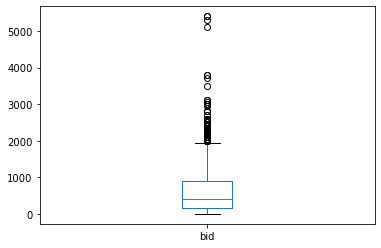

In [22]:
# Before outlier treatement
df["bid"].plot.box()

Inter-Quantile Range :  734.0
-940.0
1996.0
AxesSubplot(0.125,0.125;0.775x0.755)


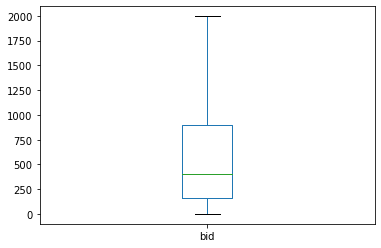

In [23]:
# Calculating IQR for bid feature
IQR=df.bid.quantile(0.75)-df.bid.quantile(0.25)
print("Inter-Quantile Range : ",IQR)

# Checking Extreme Outliers
lower_bridge=df['bid'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['bid'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

#
data.loc[data['bid']>=1996,'bid']=1996
print(data.bid.plot.box())

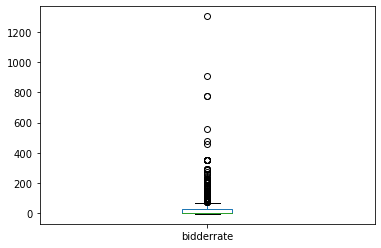

In [24]:
# Betore outlier treatment
df["bidderrate"].plot.box()

Inter-Quantile Range :  29.0
-1100.0
1131.0
AxesSubplot(0.125,0.125;0.775x0.755)


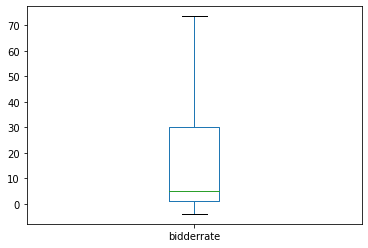

In [25]:
# Calculating IQR for bidderrate
IQR_bidderrate = df.bidderrate.quantile(0.75) - df.bidderrate.quantile(0.25)
print("Inter-Quantile Range : ", IQR_bidderrate)

# Checking Extreme outliers
lower = df["bidderrate"].quantile(0.25) - (IQR * 1.5)
upper = df["bidderrate"].quantile(0.75) + (IQR * 1.5)
print(lower)
print(upper)

data.loc[data['bidderrate'] >= 73.5, "bidderrate"] = 73.5
print(data.bidderrate.plot.box())

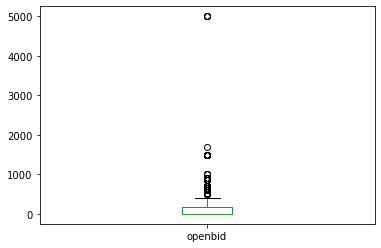

In [26]:
# Before outlier treatement
df["openbid"].plot.box()

Inter-quantile Range :  174.0
-1100.0 , 1276.0
AxesSubplot(0.125,0.125;0.775x0.755)


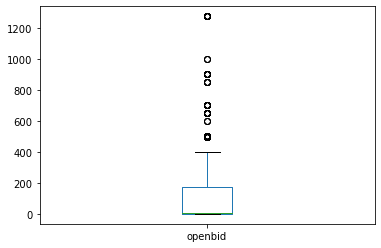

In [27]:
# Calculation IQR for openbid
IQR_openbid = df.openbid.quantile(0.75) - df.openbid.quantile(0.25)
print("Inter-quantile Range : ", IQR_openbid)

# Checking Extreme Outliers
low =  df["openbid"].quantile(0.25) - (IQR * 1.5)
up = df["openbid"].quantile(0.75) + (IQR * 1.5)
print(low,",", up)

data.loc[data["openbid"] >= 1276, "openbid"] = 1276
print(data.openbid.plot.box())

In [28]:
data

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price
0,1644594033,493.00,6.999456,boraborabora,67.0,9.99,498.00
1,1639309309,30.00,1.669618,aclbjc,0.0,1.00,374.99
2,1644109746,1996.00,6.917986,nelsoncpm,7.0,1.00,3103.00
3,1649858595,175.00,3.107014,pialu9,4.0,7.99,202.50
4,1647846714,226.00,2.721319,geemeetee@aol.com,17.0,1.00,905.45
...,...,...,...,...,...,...,...
1208,1643244227,750.00,3.544514,adammurry,5.0,499.00,1025.00
1209,1649639405,1505.00,1.583704,anasandak,1.0,1.00,1880.00
1210,1640179146,320.99,2.608287,bdsr1,0.0,1.00,455.00
1211,1644049270,1250.00,6.857986,hugo44,6.0,0.01,1600.00


    Looks like we have trated all outlier points by using IQR.
    
    Lets check our model performance with outlier treatement  and without treatement
        
   + df = our original data, which is WITHOUT Outlier Treatement.
   + data = our copy data, which is WITH Outlier Treatement.

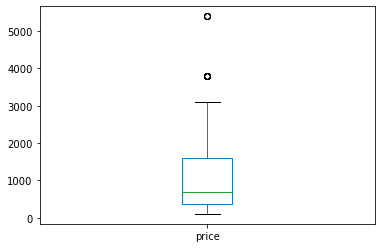

In [29]:
# before outlier treatement
df.price.plot.box()

In [31]:
df_1 = data.copy()

Inter-quantile Range :  174.0
-726.01 , 2701.0
AxesSubplot(0.125,0.125;0.775x0.755)


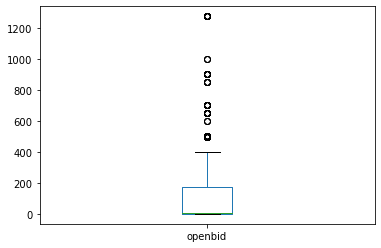

In [32]:
# Calculation IQR for openbid
IQR_price = df.price.quantile(0.75) - df.price.quantile(0.25)
print("Inter-quantile Range : ", IQR_openbid)

# Checking Extreme Outliers
lower_quantile =  df["price"].quantile(0.25) - (IQR * 1.5)
upper_quantile = df["price"].quantile(0.75) + (IQR * 1.5)
print(lower_quantile,",", upper_quantile)

df_1.loc[df_1["price"] >= 2701, "price"] = 2701
print(data.openbid.plot.box())

### Correlation

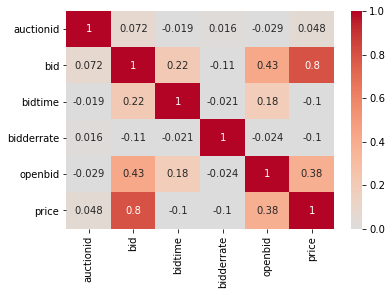

In [33]:
sns.heatmap(data.corr(), annot = True, vmin=0, vmax=1, center= 0, cmap= 'coolwarm')

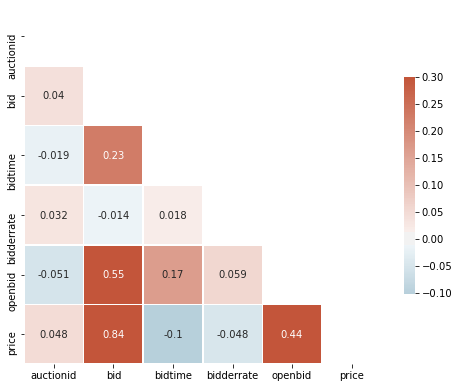

In [34]:
#Plotting a diagonal correlation matrix

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

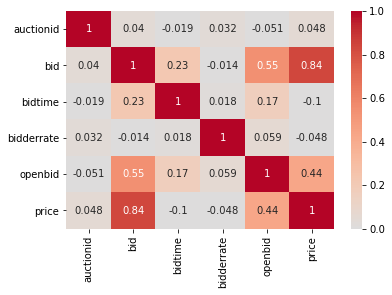

In [35]:
sns.heatmap(df.corr(), annot = True, vmin=0, vmax=1, center= 0, cmap= 'coolwarm')

In [36]:
# Correlation Matrx

round(df.corr(),3)

,auctionid,bid,bidtime,bidderrate,openbid,price
auctionid,1.000,0.040,-0.019,0.032,-0.051,0.048
bid,0.040,1.000,0.226,-0.014,0.545,0.837
bidtime,-0.019,0.226,1.000,0.018,0.165,-0.103
bidderrate,0.032,-0.014,0.018,1.000,0.059,-0.048
openbid,-0.051,0.545,0.165,0.059,1.000,0.437
price,0.048,0.837,-0.103,-0.048,0.437,1.000


 > from above Correlation Matric & Heatmap we can conclude it that,

   - actionid is not correlated with any feature.
   - bid correlated with price at 0.84. we can say price is highly correlate with bid feature
   - bid & openbid are correlated with each other at 0.55
   - openbid & price are also correlate with each other at 0.44
   
  > We could conclude that bid & openbid are only correlated with price 
  > while bidtime & bidderrate are negatively correlated with target variable.
  
  > for further prediction we can use these to features rather using all

In [37]:
# Dropping 'bidder' column

data.drop("bidder", axis = 1,inplace = True)
data

,auctionid,bid,bidtime,bidderrate,openbid,price
0,1644594033,493.00,6.999456,67.0,9.99,498.00
1,1639309309,30.00,1.669618,0.0,1.00,374.99
2,1644109746,1996.00,6.917986,7.0,1.00,3103.00
3,1649858595,175.00,3.107014,4.0,7.99,202.50
4,1647846714,226.00,2.721319,17.0,1.00,905.45
...,...,...,...,...,...,...
1208,1643244227,750.00,3.544514,5.0,499.00,1025.00
1209,1649639405,1505.00,1.583704,1.0,1.00,1880.00
1210,1640179146,320.99,2.608287,0.0,1.00,455.00
1211,1644049270,1250.00,6.857986,6.0,0.01,1600.00


In [38]:
# Checking Spearman's Rank Correlation

from scipy.stats import spearmanr

# Checking correlation
spearman = (spearmanr(data, axis=1))
spearman

SpearmanrResult(correlation=array([[1.        , 0.77142857, 0.94285714, ..., 0.77142857, 0.82857143,
        0.94285714],
       [0.77142857, 1.        , 0.82857143, ..., 1.        , 0.94285714,
        0.82857143],
       [0.94285714, 0.82857143, 1.        , ..., 0.82857143, 0.94285714,
        0.82857143],
       ...,
       [0.77142857, 1.        , 0.82857143, ..., 1.        , 0.94285714,
        0.82857143],
       [0.82857143, 0.94285714, 0.94285714, ..., 0.94285714, 1.        ,
        0.77142857],
       [0.94285714, 0.82857143, 0.82857143, ..., 0.82857143, 0.77142857,
        1.        ]]), pvalue=array([[0.        , 0.0723965 , 0.00480466, ..., 0.0723965 , 0.04156268,
        0.00480466],
       [0.0723965 , 0.        , 0.04156268, ..., 0.        , 0.00480466,
        0.04156268],
       [0.00480466, 0.04156268, 0.        , ..., 0.04156268, 0.00480466,
        0.04156268],
       ...,
       [0.0723965 , 0.        , 0.04156268, ..., 0.        , 0.00480466,
        0.04156268],

In [ ]:
# dropping bidder column
# df.drop("bidder", axis = 1,inplace = True)

data.drop("bidder", axis = 1, inplace = True)
data

## Evaluate & Model : Baseline

In [ ]:
# Seprating Target Variable from other features
X_c = data.drop("price", axis = 1)
y_c = data['price']

In [ ]:
# Splitting data into train & test  (with outhlier treatment)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size = 0.2, random_state = 2)

# stratify=data['price'] this function used only for classification based problem

X_train_c.shape, X_test_c.shape

In [39]:
# Sperating target feature from other features
X = data.drop("price", axis = 1)
y = data["price"]

# Splitting main data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 2)

#### 1. Linear Regression

In [40]:
# Using our main dataset
lr = LinearRegression()
lr.fit(X_train, y_train)

# Prediction on test set
lin_pred = lr.predict(X_test)

#### 2. Random Forest Regression

In [41]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Predicting RF
rf_pred = rf.predict(X_test)

#### 3. Extra Trees Regression

In [42]:
xt = ExtraTreesRegressor()
xt.fit(X_train, y_train)

# Prediction
xt_pred = xt.predict(X_test)

#### 4. AdaBoost Regression

In [43]:
ab = AdaBoostRegressor()
ab.fit(X_train, y_train)

# Prediction
ab_pred = ab.predict(X_test)

#### 5. Gadient Boosting Regressor

In [44]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

# Prediction
gb_pred = gb.predict(X_test)

    from above table we can see-
        
   >  1. Extra Trees Regression > RMSE is 208
   >  2. Random Forest Regression > RMSE is 218
   >  3. Gradient Boosting Regression > RMSE is 266

### Hyper-Parameter Tuning

#### GridSearchCV
 
   - for Random Forest Regression
   - for Extra Trees Regression
   - for Gadient Boosting Regression
   - for AdaBoost Regression

In [ ]:
help(GridSearchCV)

###### 1.  GridSearchCV for Extra Trees Regression

In [45]:
param = {
    'n_estimators' : [50,100, 150,195],
    'criterion' : ['mse', 'mae'],
    'max_depth' : [15,25],
    'min_samples_split' : [2],
    'min_samples_leaf' : [1],
    'max_features': ['auto','sqrt', 'log2'],
    'bootstrap' : [False],}

In [46]:
from sklearn.model_selection import GridSearchCV
xt_grid = ExtraTreesRegressor(random_state = 2)

# Running GridSearchCV
grid_xt = GridSearchCV(xt_grid, param_grid = param, scoring = 'neg_root_mean_squared_error',
                       n_jobs = 4, verbose = 2)

# fit the gridsearchcv model
grid_xt.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:  3.7min finished


GridSearchCV(estimator=ExtraTreesRegressor(random_state=2), n_jobs=4,
             param_grid={'bootstrap': [False], 'criterion': ['mse', 'mae'],
                         'max_depth': [15, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [50, 100, 150, 195]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [47]:
print("Best Parameters - ", grid_xt.best_params_, "\n")
print("Best Estimator - ", grid_xt.best_estimator_, "\n")

# running Prediction & RMSE
xt_grid_pred = grid_xt.predict(X_test)
print("RMSE - ", mean_squared_error(y_test, xt_grid_pred, squared = False))

Best Parameters -  {'bootstrap': False, 'criterion': 'mae', 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 195} 

Best Estimator -  ExtraTreesRegressor(criterion='mae', max_depth=25, max_features='sqrt',
                    n_estimators=195, random_state=2) 

RMSE -  180.4724907321337


   > at ExtraTreesRegressor(criterion='mae', max_depth=25, max_features='sqrt', n_estimators=195, random_state=2) - the RMSE is 180.47.
     

##### 2. GridSearchCV with Random Forest

In [48]:
# parameters for Random Forest & Extra Trees

# Number of trees
estimators = [35, 70, 105, 135]
# Measure the quality of split
criteria = ['mse', 'mae']
# Maximum Depth of tree
depth = [5, 10] 
#depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 6)]
# Minimum sample split required
#min_split = [int(x) for x in np.lipspace(5, 75, num = 15)]
min_split = [2]
# Minimum Leaf numbers
min_leaf = [1]
# Maximum Features
feature = ['sqrt', 'log2']

param_grid = { 
    'n_estimators': estimators,
    'max_depth' : depth,
    'criterion' :criteria,
    'min_samples_split' : min_split,
    'min_samples_leaf' : min_leaf,
    'max_features': feature,}

In [ ]:
help(rf)

In [49]:
rf_grid = RandomForestRegressor(random_state = 2)

# Running GridSearchCV 
grid_rf = GridSearchCV(estimator = rf_grid, param_grid = param_grid, n_jobs = -1, verbose = 2)

# Fitting grid_rf
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   37.1s finished


GridSearchCV(estimator=RandomForestRegressor(random_state=2), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [35, 70, 105, 135]},
             verbose=2)

In [50]:
# Checking best estimator & best params
print("Best Parameters - ", grid_rf.best_params_, "\n")
print("Best Estimator - ",grid_rf.best_estimator_, "\n")

# running prediction
rf_grid_pred = grid_rf.predict(X_test)
print("RMSE - ", mean_squared_error(y_test, rf_grid_pred, squared = False))

Best Parameters -  {'criterion': 'mse', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 135} 

Best Estimator -  RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=135,
                      random_state=2) 

RMSE -  220.03641581822922


   > RMSE at RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=135,random_state=2) - 220.04

##### 3. GridSearchCV for Gadient Boosting Regression

In [ ]:
help(GradientBoostingRegressor)

In [51]:
paras = {
    "loss" : ['ls', 'lad'],
    "learning_rate" : [0.2],
    'n_estimators' : [125, 250, 375,500],
    'criterion' : ['friedman_mse', 'mse', 'mae'],
    'min_samples_split' : [3],
    'min_samples_leaf' : [2],
    'max_depth' : [5],}

In [52]:
gb_grid = GradientBoostingRegressor(random_state = 2) 

# running GridSearchCV
grid_gb = GridSearchCV(gb_grid, param_grid = paras, n_jobs = -1, verbose = 3)

# Fitting grid_gb to Train & Test Data
grid_gb.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  3.3min finished


GridSearchCV(estimator=GradientBoostingRegressor(random_state=2), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'learning_rate': [0.2], 'loss': ['ls', 'lad'],
                         'max_depth': [5], 'min_samples_leaf': [2],
                         'min_samples_split': [3],
                         'n_estimators': [125, 250, 375, 500]},
             verbose=3)

In [53]:
# Checking best estimator & and best paramaeter
print("Best Parameters - ", grid_gb.best_params_, "\n")
print("Best Estimator - ", grid_gb.best_estimator_, "\n")

# Prediction & Checking RMSE
grid_gb_pred = grid_gb.predict(X_test)

print("RMSE - ", mean_squared_error(y_test, grid_gb_pred, squared = False))

Best Parameters -  {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'ls', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 375} 

Best Estimator -  GradientBoostingRegressor(learning_rate=0.2, max_depth=5, min_samples_leaf=2,
                          min_samples_split=3, n_estimators=375,
                          random_state=2) 

RMSE -  162.93187433292672


  >  RMSE at GradientBoostingRegressor(learning_rate=0.2, max_depth=5, min_samples_leaf=2,
                                      min_samples_split=3, n_estimators=500,random_state=2) - 162.67

##### Models Comparison

In [54]:
models = {'Linear Regression': lr, 
          'Random Forest Regression': rf, 
          'Extra Trees Regression': xt, 
          'AdaBoost Regression' : ab, 
          'Gradient Boosting Regression': gb, 
          'GridSearchCV_Random Forest': grid_rf,
          'GridSearchCV_Extra Trees ': grid_xt, 
          'GridSearchCV_Gradient Boosting': grid_gb}

test_data = [X_test, X_test, X_test, X_test, X_test, X_test, X_test, X_test]
model_performance = []
exp = 1
for key, value in models.items():
  model_performance.append([exp, key, round(mean_squared_error(y_test, value.predict(test_data[exp-1]), 
                                                               squared = False),2)])
  exp += 1

In [55]:
models = pd.DataFrame(model_performance, columns=['Sr.no', 'Models', 'RMSE'])
models

,Sr.no,Models,RMSE
0,1,Linear Regression,449.08
1,2,Random Forest Regression,216.47
2,3,Extra Trees Regression,200.15
3,4,AdaBoost Regression,405.95
4,5,Gradient Boosting Regression,265.93
5,6,GridSearchCV_Random Forest,220.04
6,7,GridSearchCV_Extra Trees,180.47
7,8,GridSearchCV_Gradient Boosting,162.93


 > from above model comparison dataframe, we could conclude that GirdSearchCV_GradientBoosting Regression has lowest Root Mean Squared Error as compared to other models. So this is best fitting model.

### Running Prediction on Test data using GridSearchCV_GradientBoosting Model

In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   auctionid   337 non-null    int64  
 1   bid         337 non-null    float64
 2   bidtime     337 non-null    float64
 3   bidder      337 non-null    object 
 4   bidderrate  337 non-null    int64  
 5   openbid     337 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 15.9+ KB


In [58]:
test.drop("bidder", axis = 1, inplace = True)
test

,auctionid,bid,bidtime,bidderrate,openbid
0,1640550476,175.00,4.329410,8,1.0
1,1644343468,111.11,0.587164,84,1.0
2,1639979107,103.50,6.999572,2,5.0
3,1649718196,620.00,2.750775,24,1.0
4,1644077820,60.00,1.393611,-1,1.0
...,...,...,...,...,...
332,1639309309,270.00,3.501551,5,1.0
333,1650699048,107.77,5.521979,260,10.0
334,1641629836,365.00,5.486759,0,250.0
335,1642005995,375.00,1.941875,25,99.0


In [61]:
# Outlier Treatement
test.loc[test['bid']>=1996,'bid']=1996
test.loc[test['bidderrate'] >= 73.5, "bidderrate"] = 73.5
test.loc[test["openbid"] >= 1276, "openbid"] = 1276

In [62]:
test

,auctionid,bid,bidtime,bidderrate,openbid
0,1640550476,175.00,4.329410,8.0,1.0
1,1644343468,111.11,0.587164,73.5,1.0
2,1639979107,103.50,6.999572,2.0,5.0
3,1649718196,620.00,2.750775,24.0,1.0
4,1644077820,60.00,1.393611,-1.0,1.0
...,...,...,...,...,...
332,1639309309,270.00,3.501551,5.0,1.0
333,1650699048,107.77,5.521979,73.5,10.0
334,1641629836,365.00,5.486759,0.0,250.0
335,1642005995,375.00,1.941875,25.0,99.0


In [70]:
# Prediction & Checking RMSE
grid_gb_test_pred = np.round_(grid_gb.predict(test), 2)


In [72]:
Pred_data = pd.DataFrame({"prediction" : grid_gb_test_pred} )
Pred_data

#Pred_data.to_csv("Prediction")
Pred_data.to_csv('Auction_predict.csv', index = False)

In [ ]:
res = pd.DataFrame(predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("prediction_results.csv", index = False) 